pythonでGibbs samplingする

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
c_list = sns.color_palette().as_hex()
color_num = len(c_list)

In [3]:
np.random.seed(1)

# 2次元ガウス分布

In [4]:
mu = [0.0, 0.0]
s = [[1.0, 0.5], [0.5, 1.0]]

In [5]:
zs_np = np.random.multivariate_normal(mean=mu, cov=s, size=1000)

In [6]:
%%time
# Gibbs sampling
n_sample = 1000
z = [4, -3]
zs = [z.copy()]

while len(zs) < n_sample:
    mu0 = mu[0] + s[0][1]/s[1][1]*(z[1]-mu[1])
    v0 = s[0][0] - s[0][1]/s[1][1]*s[1][0]
    z[0] = np.random.normal(loc=mu0, scale=v0, size=1)[0]
    zs.append(z.copy())
    
    mu1 = mu[1] + s[1][0]/s[0][0]*(z[0]-mu[0])
    v1 = s[1][1] - s[1][0]/s[0][0]*s[0][1]
    z[1] = np.random.normal(loc=mu1, scale=v1, size=1)[0]
    zs.append(z.copy())
zs_gs = np.array(zs)

CPU times: user 43.8 ms, sys: 0 ns, total: 43.8 ms
Wall time: 43.8 ms


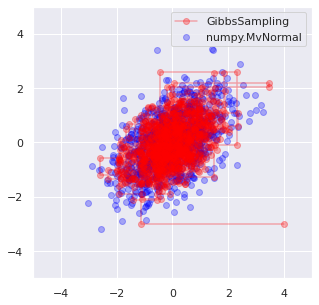

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.subplots(1, 1)

ax.scatter(zs_np[:, 0], zs_np[:, 1], color="blue", alpha=0.3, label="numpy.MvNormal")
ax.plot(zs_gs[:, 0], zs_gs[:, 1], '-o', color="red", alpha=0.3, label="GibbsSampling")
ax.set_xlim((-5, 5));
ax.set_ylim((-5, 5));
ax.legend();